# Modelado de texto

In [1]:
import pandas as pd
import nltk

In [1]:
import string

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elogrono\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from unidecode import unidecode # Para eliminar acentos
from nltk.tokenize import TweetTokenizer # Tokenizador de tweets, tokeniza el texto en palabras
from string import punctuation # Signos de puntuacion
from nltk.corpus import stopwords # Stopwords para español

In [4]:
stop_words = [unidecode(stopW) for stopW in stopwords.words('spanish')] # Stopwords en español para eliminar del texto
non_words = list(punctuation)
non_words.extend(['¿', '¡', 'q', 'd', 'x', 'xq', '...', '..'])
stop_words = stop_words + non_words

In [5]:
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'mas', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'si', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'tambien', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mi', 'antes', 'algunos', 'que', 'unos', 'yo', 'otro', 'otras', 'otra', 'el', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tu', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mio', 'mia', 'mios', 'mias', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estas', 'esta', 'estamos', 'estais', 'estan', 'e

In [6]:
data = pd.read_excel('4_articles.xlsx')

In [7]:
data.head()

,Unnamed: 0,text_y
0,0,\n bienvenidos a la segunda edición...
1,1,"familiares y amigos de pedro aguilar, quien su..."
2,2,los asaltantes llegaron con armas de fuego has...
3,3,"según cnn en español, una encuesta de 2021 rev..."
4,4,durante la filmación dos actores fallecieron t...


In [8]:
#data.drop('Unnamed: 0', axis = 1, inplace = True)
data = data['text_y']

In [9]:
data.shape

(8992,)

In [10]:
data.head()

0    \n            bienvenidos a la segunda edición...
1    familiares y amigos de pedro aguilar, quien su...
2    los asaltantes llegaron con armas de fuego has...
3    según cnn en español, una encuesta de 2021 rev...
4    durante la filmación dos actores fallecieron t...
Name: text_y, dtype: object

In [11]:
type(data)

pandas.core.series.Series

In [12]:
tknzr = TweetTokenizer()
clean_sentences_split = []
for dirty_sent in data:
    # Se quitan los signos de puntuación y se tokeniza
    tokens = [token.lower() for token in tknzr.tokenize(unidecode(dirty_sent))
              if token.lower() not in stop_words]
    
    #processed_sentence = ' '.join(tokens) #las palabras limpias vuelven a formar la oración
                                           #no se requiere esto con gensim
    if tokens: # Agregar solo si hay tokens
        clean_sentences_split.append(tokens) #save the clean prepocessed sentence in clean_sentences

print(len(clean_sentences_split))

8992


- En una compresiion list el primer valor es lo que va a ingresar
- Lo segundo es el bucle for [   for iterator in iterable ]
- Tercero condicion [      if condition]
- Con if else [ .... if condition else ....... for iterator in iterable]

In [13]:
clean_sentences_split[0:3]

[['bienvenidos',
  'segunda',
  'edicion',
  'apuesta',
  'ecuador',
  'iniciativa',
  'invita',
  'volar',
  'alto',
  'pyme',
  'emprendimiento',
  'disfrutar',
  'retroalimentacion',
  'coaches',
  'inscribete',
  'recibe',
  'reconocimientos',
  'potenciar',
  'negocio',
  'presentan',
  'avalado',
  'auspician',
  'ejecutiva',
  '10',
  'anos',
  'experiencia',
  'enfocada',
  'rol',
  'sector',
  'privado',
  'desarrollo',
  'economico',
  'social',
  'paises',
  'inicio',
  'carrera',
  'laboratorio',
  'innovacion',
  'banco',
  'interamericano',
  'desarrollo',
  'bid',
  'rol',
  'dentro',
  'bid',
  'apoyo',
  'supervision',
  '25',
  'proyectos',
  'diferentes',
  'monto',
  '15',
  'millones',
  'dolares',
  'prestamos',
  'asistencias',
  'tecnicas',
  'especialmente',
  'dedicadas',
  'fortalecimiento',
  'crecimiento',
  'pymes',
  'ecuador',
  'posteriormente',
  'trabajo',
  'londres',
  'mobile',
  'for',
  'development',
  'fundacion',
  'gsma',
  'dedicado',
  'est

In [14]:
file_path = 'articles.txt'
with open(file_path, 'w') as file:
    for sentence in clean_sentences_split:
        processed_sentence = ' '.join(sentence)
        file.write(processed_sentence + '\n')
print(f'El array se ha guardado en {file_path}')

El array se ha guardado en articles.txt


In [ ]:
#with open('articles.txt', 'r', encoding='utf-8') as file:
    #documento = file.read()
#print(len(documento))

## Entrenamiento del modelo Word2Vec

In [16]:
import gensim
from gensim.models import Word2Vec

In [17]:
model = Word2Vec(sentences=clean_sentences_split, vector_size=300, window=5, min_count=2) #size es parametro antiguo
#Guardar el Modelo
# El min count es para que solo tome en cuenta las palabras que aparecen al menos 2 veces
# vector_size es el tamaño del vector de cada palabra
model.save('noticias_emb.bin')

In [18]:
# Load pre-trained Word2Vec model.
model = Word2Vec.load('noticias_emb.bin')

In [19]:
#Rendimiento del modelo
vector = model.wv['ecuador']
print(vector)

[-2.61991262e-01  7.66185999e-01  5.52455068e-01  3.68411958e-01
  9.59790528e-01  7.26065993e-01  5.69831252e-01  1.24251175e+00
  6.66102588e-01 -1.36328125e+00  1.81338406e+00 -1.00739384e+00
  1.15628314e+00  3.79530281e-01  1.47571683e-01 -1.04393709e+00
  4.59963411e-01 -5.99579871e-01 -6.75415695e-01 -2.80143470e-01
 -1.98904008e-01 -2.51077026e-01  3.53681952e-01  1.56559914e-01
 -6.80896223e-01 -1.78592965e-01 -8.06641936e-01  4.33721989e-01
  2.88822234e-01  2.71943331e-01 -7.37507105e-01  5.29244021e-02
 -5.82184136e-01 -7.64682531e-01  5.21633863e-01 -5.08650482e-01
  1.63200748e+00  5.09447575e-01 -1.64493692e+00  4.59703691e-02
  5.94951034e-01 -5.41553080e-01  5.07008359e-02 -9.51208055e-01
  6.92238569e-01  4.14126068e-01  1.56439632e-01 -2.79243141e-01
  3.12347800e-01 -1.09595203e+00 -2.81153083e-01  1.48053849e+00
  4.16766889e-02 -5.91091029e-02 -6.14330769e-01 -6.29343390e-02
  4.77543145e-01  1.78932454e-02  3.78693461e-01 -6.41915277e-02
  1.69276729e-01 -5.24008

In [20]:
palabras_cercanas = model.wv.most_similar("ecuador", topn=10)
palabras_cercanas

[('pais', 0.7245911359786987),
 ('unidos', 0.6784948706626892),
 ('ecuad', 0.6742708683013916),
 ('europa', 0.6740425229072571),
 ('peru', 0.66597980260849),
 ('mexico', 0.6231278777122498),
 ('escandinavia', 0.618388295173645),
 ('relacionadas', 0.6164857745170593),
 ('relaciondas', 0.6158590316772461),
 ('acontecio', 0.6130563616752625)]

In [21]:
palabras_cercanas = model.wv.most_similar("emelec", topn=10)
palabras_cercanas

[('barcelona', 0.9803011417388916),
 ('aucas', 0.977253794670105),
 ('sc', 0.9754596948623657),
 ('fc', 0.9572145342826843),
 ('delfin', 0.9545479416847229),
 ('astillero', 0.9447503685951233),
 ('orense', 0.9426634907722473),
 ('visitante', 0.9360326528549194),
 ('golea', 0.9323559999465942),
 ('independiente', 0.931757926940918)]

In [22]:
palabras_cercanas = model.wv.most_similar("ambato", topn=10)
palabras_cercanas

[('machala', 0.947029173374176),
 ('monte', 0.9442923069000244),
 ('pascuales', 0.9426481127738953),
 ('ubicada', 0.940095067024231),
 ('portoviejo', 0.9394509196281433),
 ('bellavista', 0.9363991022109985),
 ('riobamba', 0.935188889503479),
 ('caraquez', 0.9348723292350769),
 ('manta', 0.9330469965934753),
 ('daule', 0.9308971166610718)]

In [23]:
palabras_cercanas = model.wv.most_similar("correa", topn=10)
palabras_cercanas

[('expresidente', 0.9656447768211365),
 ('rafael', 0.9479016661643982),
 ('luque', 0.9452055096626282),
 ('lenin', 0.9371289014816284),
 ('avellan', 0.9284772872924805),
 ('borrero', 0.9179831743240356),
 ('ulloa', 0.9177480340003967),
 ('legislador', 0.917218029499054),
 ('vladimir', 0.9169743657112122),
 ('exsecretario', 0.9159059524536133)]

In [24]:
palabras_cercanas = model.wv.most_similar("presidente", topn=10)
palabras_cercanas

[('republica', 0.8926592469215393),
 ('vladimir', 0.8861210346221924),
 ('volodimir', 0.8848218321800232),
 ('iza', 0.876432478427887),
 ('leonidas', 0.8727254867553711),
 ('biden', 0.8717586994171143),
 ('lasso', 0.8697616457939148),
 ('guillermo', 0.8647652268409729),
 ('gianni', 0.8626041412353516),
 ('joe', 0.8615625500679016)]

In [25]:
palabras_cercanas = model.wv.most_similar("covid", topn=10)
palabras_cercanas

[('pandemia', 0.8949280381202698),
 ('coronavirus', 0.8377034068107605),
 ('influenza', 0.83269202709198),
 ('contagios', 0.8287535905838013),
 ('aviar', 0.8158444762229919),
 ('brote', 0.8154146075248718),
 ('rebrote', 0.807594358921051),
 ('virus', 0.7981782555580139),
 ('gripe', 0.7963671684265137),
 ('viruela', 0.7957993149757385)]

In [29]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [30]:
## Next you have some necessary steps part of the transformation of 300dim to 2D in order 
pca = PCA(n_components=2)

In [31]:
# you can think of a group of words that make sense to be together/far away to view in the plot
toplot_words = ['amor', 'bueno', 'feliz', 'corazon', 'paz',#words about positive feelings
'champions', 'league', 'chelsea', 'emelec', 'barcelona',#futbal-related terms
'facebook', 'youtube', 'instagram', 'twitter' #media-related words
]

In [32]:
toplot_vecs = [model.wv[w] for w in toplot_words] #getting the vectors for the specific words

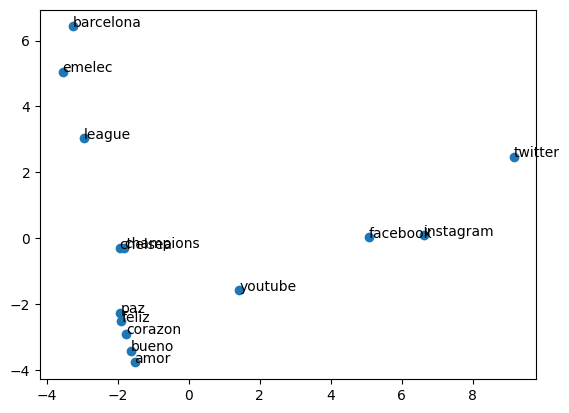

In [33]:
result = pca.fit_transform(toplot_vecs) #call to pca for transformation
#print(result)
# finally plotting...
pyplot.scatter(result[:, 0], result[:, 1]) #result[:, 0] para eje x y result[:, 1] para eje y
for i, word in enumerate(toplot_words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [34]:
similar_words = model.wv.most_similar(positive=['biden', 'mexico'], negative=['ee.uu'], topn=10)
similar_words

[('visita', 0.7915116548538208),
 ('lula', 0.7771177887916565),
 ('ceremonia', 0.7674024701118469),
 ('wikileaks', 0.7663771510124207),
 ('mexicano', 0.7617402076721191),
 ('viajara', 0.7599804401397705),
 ('abdelfatah', 0.7586992979049683),
 ('bento', 0.7530069947242737),
 ('inacio', 0.7509164810180664),
 ('venezuela', 0.7508077025413513)]

In [35]:
similar_words = model.wv.most_similar(positive=['flores', 'quito'], negative=['ambato'], topn=10)
similar_words

[('empresario', 0.6481930613517761),
 ('alocucion', 0.6469662189483643),
 ('moraga', 0.6383079886436462),
 ('hoyle', 0.635648787021637),
 ('desvirtuo', 0.6341490745544434),
 ('carta', 0.6309614777565002),
 ('luque', 0.6267692446708679),
 ('manifesto', 0.624697744846344),
 ('curriculum', 0.6243391036987305),
 ('banegas', 0.6230524182319641)]

In [ ]:
similar_words = model.wv.most_similar(positive=['asamblea', 'presidente'], negative=['asambleista'], topn=10)
similar_words

In [ ]:
similar_words = model.wv.most_similar(positive=['emprendimiento', 'educacion'], negative=['empresa'],topn=10)
similar_words

In [ ]:
similar_words = model.wv.most_similar(positive=['salud', 'escuela'], negative=['hospital'], topn=10)
similar_words

In [ ]:
similar_words = model.wv.most_similar(positive=['ladron', 'alcaldia'], negative=['sicariato'], topn=10)
similar_words

In [ ]:
similar_words = model.wv.most_similar(positive=['ciudad', 'ciudad'], negative=['pais'], topn=10)
similar_words

In [ ]:
similar_words = model.wv.most_similar(positive=['caces', 'salud'], negative=['educacion'], topn=10)
similar_words

In [ ]:
similar_words = model.wv.most_similar(positive=['hospital', 'futbolista'], negative=['medico'], topn=10)
similar_words

In [ ]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('obama', 'maduro')
sim2 = model.wv.similarity('obama', 'trump')
sim3 = model.wv.similarity('obama', 'shakira')
print('Similarity between "obama" and "maduro":', sim1)
print('Similarity between "obama" and "trump":', sim2)
print('Similarity between "obama" and "shakira":', sim3)

In [ ]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('universidad', 'ciencia')
sim2 = model.wv.similarity('universidad', 'investigacion')
sim3 = model.wv.similarity('universidad', 'futbol')
print('Similarity between "universidad" and "ciencia":', sim1)
print('Similarity between "universidad" and "investigacion":', sim2)
print('Similarity between "universidad" and "futbol":', sim3)

In [ ]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('medico', 'hospital')
sim2 = model.wv.similarity('medico', 'cancha')
sim3 = model.wv.similarity('medico', 'empresa')
print('Similarity between "medico" and "hospital":', sim1)
print('Similarity between "medico" and "cancha":', sim2)
print('Similarity between "medico" and "empresa":', sim3)

In [ ]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('emprendimiento', 'negocio')
sim2 = model.wv.similarity('emprendimiento', 'innovacion')
sim3 = model.wv.similarity('emprendimiento', 'desarrollo')
print('Similarity between "emprendimiento" and "negocio":', sim1)
print('Similarity between "emprendimiento" and "innovacion":', sim2)
print('Similarity between "emprendimiento" and "desarrollo":', sim3)

In [ ]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('coach', 'retroalimentacion')
sim2 = model.wv.similarity('coach', 'equipo')
sim3 = model.wv.similarity('coach', 'entrenadores')
print('Similarity between "coach" and "retroalimentacion":', sim1)
print('Similarity between "coach" and "equipo":', sim2)
print('Similarity between "coach" and "entrenadores":', sim3)

In [ ]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('experiencia', 'conocimiento')
sim2 = model.wv.similarity('experiencia', 'habilidades')
sim3 = model.wv.similarity('experiencia', 'aprendizaje')
print('Similarity between "experiencia" and "conocimiento":', sim1)
print('Similarity between "experiencia" and "habilidades":', sim2)
print('Similarity between "experiencia" and "aprendizaje":', sim3)

In [ ]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('innovacion', 'tecnologia')
sim2 = model.wv.similarity('innovacion', 'creatividad')
sim3 = model.wv.similarity('innovacion', 'nuevo')
print('Similarity between "innovacion" and "tecnologia":', sim1)
print('Similarity between "innovacion" and "creatividad":', sim2)
print('Similarity between "innovacion" and "nuevo":', sim3)